<a href="https://colab.research.google.com/github/priyarameshd/KNN/blob/main/KNN_assignment_zoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# KNN Classification
from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import warnings
warnings.filterwarnings("ignore")

Implement a KNN model to classify the animals in to categories.

In [ ]:
zoo_df = read_csv("Zoo.csv")

### EDA and Visualization

In [ ]:
zoo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [ ]:
zoo_df.describe().T


,count,mean,std,min,25%,50%,75%,max
hair,101.0,0.425743,0.496921,0.0,0.0,0.0,1.0,1.0
feathers,101.0,0.198020,0.400495,0.0,0.0,0.0,0.0,1.0
eggs,101.0,0.584158,0.495325,0.0,0.0,1.0,1.0,1.0
milk,101.0,0.405941,0.493522,0.0,0.0,0.0,1.0,1.0
airborne,101.0,0.237624,0.427750,0.0,0.0,0.0,0.0,1.0
aquatic,101.0,0.356436,0.481335,0.0,0.0,0.0,1.0,1.0
predator,101.0,0.554455,0.499505,0.0,0.0,1.0,1.0,1.0
toothed,101.0,0.603960,0.491512,0.0,0.0,1.0,1.0,1.0
backbone,101.0,0.821782,0.384605,0.0,1.0,1.0,1.0,1.0
breathes,101.0,0.792079,0.407844,0.0,1.0,1.0,1.0,1.0


All the attributes are having value 0 or 1 except leg. Use encoding attribute to change the leg data.

In [ ]:
zoo_df = pd.get_dummies(zoo_df,columns=['legs'])

In [ ]:
zoo_df.head(2)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,tail,domestic,catsize,type,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,0,1,1,0,0,1,0,0,0
1,antelope,1,0,0,1,0,0,0,1,1,...,1,0,1,1,0,0,1,0,0,0


In [ ]:
zoo_df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
tail           0
domestic       0
catsize        0
type           0
legs_0         0
legs_2         0
legs_4         0
legs_5         0
legs_6         0
legs_8         0
dtype: int64

In [ ]:
zoo_df['animal name'].value_counts()

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64

In [ ]:
zoo_df.duplicated().sum()

0

<Axes: xlabel='type', ylabel='count'>

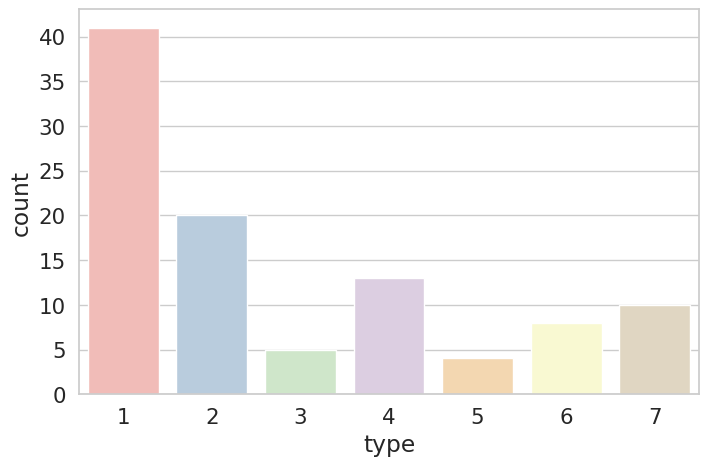

In [ ]:
sns.set(style = 'whitegrid', font_scale = 1.4)
plt.subplots(figsize = (8,5))
sns.countplot(x = 'type', data = zoo_df, palette = 'Pastel1')

In [ ]:
X = zoo_df.drop(columns=['animal name','type'],axis=1)

Y = zoo_df['type']

In [ ]:
X.head(1)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,fins,tail,domestic,catsize,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
0,1,0,0,1,0,0,1,1,1,1,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42,stratify = Y)

Cross validation

In [ ]:
num_folds = 10
kfold = KFold(n_splits=10)

In [ ]:
model = KNeighborsClassifier(n_neighbors=10).fit(x_train,y_train)
results = cross_val_score(model, x_train, y_train, cv=kfold)

In [ ]:
print(results.mean())

0.85


### Grid Search for Algorithm Tuning

In [ ]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
n_neighbors = numpy.array(range(1,50))
param_grid = dict(n_neighbors=n_neighbors)

In [ ]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.96
{'n_neighbors': 1}


Got the k value as 1 with 96% score. So for the classifier use k value 1.


### Visualizing the CV results

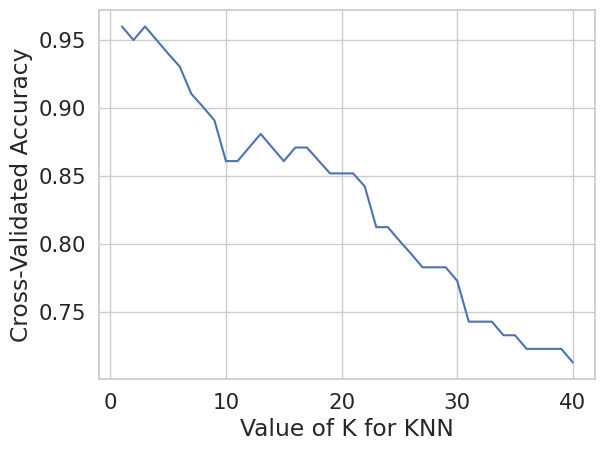

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

It's visible that acuracy is better wwhen k value is smaller.

### KNN=1 for classification

In [ ]:
model = KNeighborsClassifier(n_neighbors =1).fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

1.0


The accuracy is 100%. Use confusion matrix and classification report to check further accuracy.

In [ ]:
confusion_matrix = confusion_matrix(y_test,y_pred)


<Axes: >

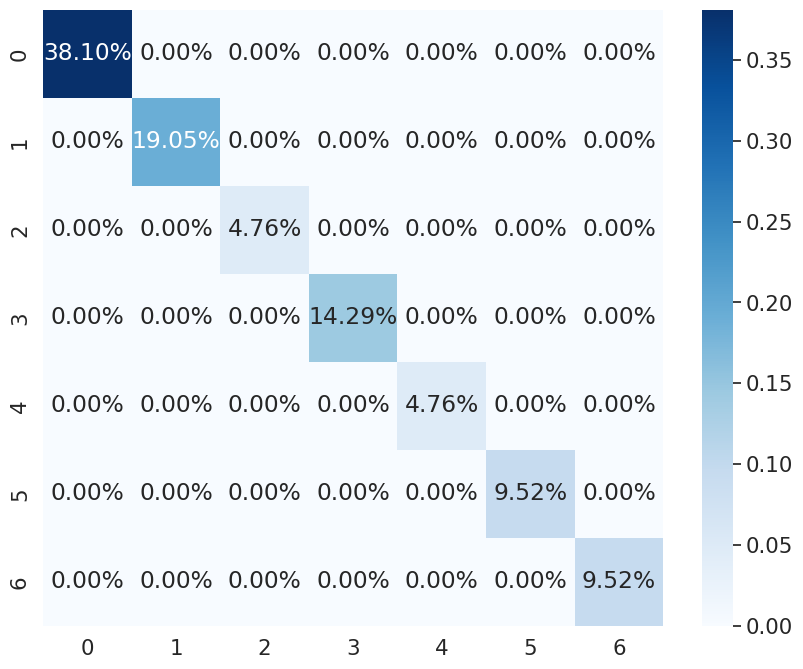

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True,
            fmt='.2%', cmap='Blues')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



 Precision and recall values is 1 for all 7 types are excellent.